<a href="https://colab.research.google.com/github/CHRISTIANDAGATTI/AEyCD---Grupo-9/blob/main/Entregable_Parte_2_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 2


En el ejercicio 2 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad e imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.** que fue guardado en un archivo (Ejercicio 3 entregable 1). 


In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas
from sklearn import (base, decomposition, feature_extraction, impute,
                     neighbors, preprocessing)
import seaborn as sns
sns.set_context('talk')

In [64]:


# Acá deberían leer el conjunto de datos que ya tienen.
melb_df = pandas.read_csv('https://raw.githubusercontent.com/CHRISTIANDAGATTI/AEyCD---Grupo-9/main/melb_data_extended.csv')
melb_df

,Suburb,Rooms,Type,Price,Distance,Postcode,Bathroom,Car,BuildingArea,YearBuilt,...,airbnb_price_max,airbnb_weekly_price_min,airbnb_weekly_price_median,airbnb_weekly_price_mean,airbnb_weekly_price_max,airbnb_monthly_price_min,airbnb_monthly_price_median,airbnb_monthly_price_mean,airbnb_monthly_price_max,airbnb_zipcode_count
0,Airport West,3,t,840000.0,13.5,3042.0,2.0,1.0,225.0,2016.0,...,264.0,351.0,400.0,568.200000,990.0,1303.0,1550.0,1800.750000,2800.0,35.0
1,Airport West,3,h,730000.0,13.5,3042.0,2.0,1.0,145.0,1965.0,...,264.0,351.0,400.0,568.200000,990.0,1303.0,1550.0,1800.750000,2800.0,35.0
2,Airport West,3,h,770000.0,13.5,3042.0,2.0,1.0,145.0,1965.0,...,264.0,351.0,400.0,568.200000,990.0,1303.0,1550.0,1800.750000,2800.0,35.0
3,Airport West,2,h,603000.0,13.5,3042.0,1.0,1.0,84.0,1950.0,...,264.0,351.0,400.0,568.200000,990.0,1303.0,1550.0,1800.750000,2800.0,35.0
4,Airport West,3,t,700000.0,13.5,3042.0,2.0,2.0,134.0,2009.0,...,264.0,351.0,400.0,568.200000,990.0,1303.0,1550.0,1800.750000,2800.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8854,Watsonia,2,h,650000.0,14.5,3087.0,1.0,1.0,79.0,2006.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8855,Werribee,4,h,635000.0,14.7,3030.0,2.0,1.0,172.0,1980.0,...,550.0,250.0,380.0,590.000000,2500.0,900.0,1300.0,2224.600000,9000.0,258.0
8856,Williamstown,3,h,1031000.0,6.8,3016.0,2.0,2.0,133.0,1995.0,...,995.0,550.0,599.5,612.250000,700.0,1990.0,2095.0,2119.750000,2299.0,74.0
8857,Williamstown,3,h,1170000.0,6.8,3016.0,2.0,4.0,NaN,1997.0,...,995.0,550.0,599.5,612.250000,700.0,1990.0,2095.0,2119.750000,2299.0,74.0


In [65]:

melb_df.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Distance', 'Postcode', 'Bathroom',
       'Car', 'BuildingArea', 'YearBuilt', 'zipcode', 'airbnb_price_min',
       'airbnb_price_median', 'airbnb_price_mean', 'airbnb_price_max',
       'airbnb_weekly_price_min', 'airbnb_weekly_price_median',
       'airbnb_weekly_price_mean', 'airbnb_weekly_price_max',
       'airbnb_monthly_price_min', 'airbnb_monthly_price_median',
       'airbnb_monthly_price_mean', 'airbnb_monthly_price_max',
       'airbnb_zipcode_count'],
      dtype='object')

## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


**Solución: 1) Encoding**

Con el fin de poder entrenar un modelo bajo las variables en melb_combined_df, se deben codificar aquellas que sean categóricas. Para ello, se utiliza One-Hot Encoding donde se muestran dos posibles métodos distintos.

Agrupamos las variables categoricas y númericas:

In [66]:
#Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, excepto BuildingArea y YearBuilt:
melb= melb_df[['Suburb', 'Rooms', 'Type', 'Price', 'Distance', 'Bathroom', 'Car', 'airbnb_price_min', 'airbnb_price_median', 'airbnb_price_mean', 'airbnb_price_max']]

In [67]:
melb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8859 entries, 0 to 8858
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Suburb               8859 non-null   object 
 1   Rooms                8859 non-null   int64  
 2   Type                 8859 non-null   object 
 3   Price                8859 non-null   float64
 4   Distance             8859 non-null   float64
 5   Bathroom             8859 non-null   float64
 6   Car                  8830 non-null   float64
 7   airbnb_price_min     7796 non-null   float64
 8   airbnb_price_median  7796 non-null   float64
 9   airbnb_price_mean    7796 non-null   float64
 10  airbnb_price_max     7796 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 761.4+ KB


In [68]:
#Dividimos las variables por categoricas y numericas:
categorical_cols = ['Type', 'Suburb']
numerical_cols = ['Rooms', 'Price', 'Distance', 'Bathroom',
       'Car', 'airbnb_price_min',
       'airbnb_price_median', 'airbnb_price_mean', 'airbnb_price_max']

In [69]:
#Contamos los valores únicos que contiene cada variable categórica
melb[categorical_cols].nunique()

Type       3
Suburb    98
dtype: int64

In [70]:
# Contamos la existencia de nulos en cada variable categórica
melb[categorical_cols].isna().sum()

Type      0
Suburb    0
dtype: int64

In [71]:
# Contamos la existencia de nulos en cada variable númericas
melb[numerical_cols].isna().sum()

Rooms                     0
Price                     0
Distance                  0
Bathroom                  0
Car                      29
airbnb_price_min       1063
airbnb_price_median    1063
airbnb_price_mean      1063
airbnb_price_max       1063
dtype: int64

**Dict Vectorizer**

In [72]:
feature_cols = categorical_cols + numerical_cols
features = list(melb[feature_cols].T.to_dict().values())

vectorizer = feature_extraction.DictVectorizer()
feature_matrix = vectorizer.fit_transform(features)
feature_matrix

<8859x110 sparse matrix of type '<class 'numpy.float64'>'
	with 97449 stored elements in Compressed Sparse Row format>

In [73]:
vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['Bathroom',
 'Car',
 'Distance',
 'Price',
 'Rooms',
 'Suburb=Airport West',
 'Suburb=Altona',
 'Suburb=Altona North',
 'Suburb=Armadale',
 'Suburb=Ascot Vale',
 'Suburb=Ashburton',
 'Suburb=Ashwood',
 'Suburb=Avondale Heights',
 'Suburb=Balwyn',
 'Suburb=Balwyn North',
 'Suburb=Bentleigh',
 'Suburb=Bentleigh East',
 'Suburb=Box Hill',
 'Suburb=Braybrook',
 'Suburb=Brighton',
 'Suburb=Brighton East',
 'Suburb=Brunswick',
 'Suburb=Brunswick East',
 'Suburb=Brunswick West',
 'Suburb=Bulleen',
 'Suburb=Burwood',
 'Suburb=Camberwell',
 'Suburb=Carnegie',
 'Suburb=Caulfield South',
 'Suburb=Cheltenham',
 'Suburb=Clifton Hill',
 'Suburb=Coburg',
 'Suburb=Coburg North',
 'Suburb=Collingwood',
 'Suburb=Craigieburn',
 'Suburb=Doncaster',
 'Suburb=Doncaster East',
 'Suburb=Elsternwick',
 'Suburb=Elwood',
 'Suburb=Epping',
 'Suburb=Essendon',
 'Suburb=Fawkner',
 'Suburb=Fitzroy',
 'Suburb=Fitzroy North',
 'Suburb=Footscray',
 'Suburb=Glen Iris',
 'Suburb=Glen Waverley',
 'Suburb=Glenroy',
 'Subu

Se obtiene una matriz de 8859x110 cuyas columnas son las que se muestran por get_feature_names().

**Codificación One-hot encoding**

In [74]:
# OPCIÓN 1
#De esta forma obtenemos la matriz de features por medio de OneHotEncoder realizando la codificación sobre categorical_cols:
encoder = preprocessing.OneHotEncoder(sparse=False)
matrix_encoder = np.hstack([encoder.fit_transform(melb[categorical_cols]),
    melb[numerical_cols]
])
matrix_encoder.shape

(8859, 110)

Obviamente podemos verificar que alcanzamos el mismo tamaño de matriz por este metodo (8859x110).

In [75]:
# OPCIÓN 2
#De esta manera codificamos la variable categorica Type y la incluimos en el data frame original
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

transformer = make_column_transformer((OneHotEncoder(),['Type']), remainder='passthrough')

transformed = transformer.fit_transform(melb)
transformed_df = pandas.DataFrame(transformed, columns=transformer.get_feature_names_out())
transformed_df

,onehotencoder__Type_h,onehotencoder__Type_t,onehotencoder__Type_u,remainder__Suburb,remainder__Rooms,remainder__Price,remainder__Distance,remainder__Bathroom,remainder__Car,remainder__airbnb_price_min,remainder__airbnb_price_median,remainder__airbnb_price_mean,remainder__airbnb_price_max
0,0.0,1.0,0.0,Airport West,3,840000.0,13.5,2.0,1.0,0.0,65.0,81.571429,264.0
1,1.0,0.0,0.0,Airport West,3,730000.0,13.5,2.0,1.0,0.0,65.0,81.571429,264.0
2,1.0,0.0,0.0,Airport West,3,770000.0,13.5,2.0,1.0,0.0,65.0,81.571429,264.0
3,1.0,0.0,0.0,Airport West,2,603000.0,13.5,1.0,1.0,0.0,65.0,81.571429,264.0
4,0.0,1.0,0.0,Airport West,3,700000.0,13.5,2.0,2.0,0.0,65.0,81.571429,264.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8854,1.0,0.0,0.0,Watsonia,2,650000.0,14.5,1.0,1.0,NaN,NaN,NaN,NaN
8855,1.0,0.0,0.0,Werribee,4,635000.0,14.7,2.0,1.0,26.0,68.0,115.748062,550.0
8856,1.0,0.0,0.0,Williamstown,3,1031000.0,6.8,2.0,2.0,60.0,180.0,191.094595,995.0
8857,1.0,0.0,0.0,Williamstown,3,1170000.0,6.8,2.0,4.0,60.0,180.0,191.094595,995.0


In [76]:
#OPCIÓN 3
from sklearn import preprocessing
!pip install category_encoders
from category_encoders import one_hot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [77]:
#El parámetro "use_cat_names = True" permite que se incluyan los nombres de columna 
ohe = one_hot.OneHotEncoder(use_cat_names = True)
df_ohe = ohe.fit_transform(melb[categorical_cols])
df_ohe

,Type_t,Type_h,Type_u,Suburb_Airport West,Suburb_Altona,Suburb_Altona North,Suburb_Armadale,Suburb_Ascot Vale,Suburb_Ashburton,Suburb_Ashwood,...,Suburb_Oakleigh,Suburb_Cheltenham,Suburb_Craigieburn,Suburb_Doncaster East,Suburb_Epping,Suburb_Lalor,Suburb_Mill Park,Suburb_Mount Waverley,Suburb_Werribee,Suburb_Glen Waverley
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8854,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8855,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8856,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8857,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
# Eliminamos las variables que fueron codificadas del dataset
melb_drop = melb.drop(columns=['Suburb', 'Type'])


In [79]:
# Unimos el dataframe original sin las columnas categoricas con el transformado por OneHOtEncoding
df_encoder = pandas.concat([melb_drop,df_ohe], axis = 1)
df_encoder

,Rooms,Price,Distance,Bathroom,Car,airbnb_price_min,airbnb_price_median,airbnb_price_mean,airbnb_price_max,Type_t,...,Suburb_Oakleigh,Suburb_Cheltenham,Suburb_Craigieburn,Suburb_Doncaster East,Suburb_Epping,Suburb_Lalor,Suburb_Mill Park,Suburb_Mount Waverley,Suburb_Werribee,Suburb_Glen Waverley
0,3,840000.0,13.5,2.0,1.0,0.0,65.0,81.571429,264.0,1,...,0,0,0,0,0,0,0,0,0,0
1,3,730000.0,13.5,2.0,1.0,0.0,65.0,81.571429,264.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,770000.0,13.5,2.0,1.0,0.0,65.0,81.571429,264.0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,603000.0,13.5,1.0,1.0,0.0,65.0,81.571429,264.0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,700000.0,13.5,2.0,2.0,0.0,65.0,81.571429,264.0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8854,2,650000.0,14.5,1.0,1.0,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
8855,4,635000.0,14.7,2.0,1.0,26.0,68.0,115.748062,550.0,0,...,0,0,0,0,0,0,0,0,1,0
8856,3,1031000.0,6.8,2.0,2.0,60.0,180.0,191.094595,995.0,0,...,0,0,0,0,0,0,0,0,0,0
8857,3,1170000.0,6.8,2.0,4.0,60.0,180.0,191.094595,995.0,0,...,0,0,0,0,0,0,0,0,0,0


## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

**2) Solución Imputación:**

In [80]:
# Agregamos a la matriz obtenida en el punto anterior las columnas YearBuilt y BuildingArea que habiamos separado.
df_yb = melb_df[['YearBuilt','BuildingArea']]

In [81]:
# Concatenamos el dataframe creado en la linea anterior con el dataframe que contiene las variables categoricas codificadas

df = pandas.concat([df_yb, df_encoder], axis = 1)
df.head()

,YearBuilt,BuildingArea,Rooms,Price,Distance,Bathroom,Car,airbnb_price_min,airbnb_price_median,airbnb_price_mean,...,Suburb_Oakleigh,Suburb_Cheltenham,Suburb_Craigieburn,Suburb_Doncaster East,Suburb_Epping,Suburb_Lalor,Suburb_Mill Park,Suburb_Mount Waverley,Suburb_Werribee,Suburb_Glen Waverley
0,2016.0,225.0,3,840000.0,13.5,2.0,1.0,0.0,65.0,81.571429,...,0,0,0,0,0,0,0,0,0,0
1,1965.0,145.0,3,730000.0,13.5,2.0,1.0,0.0,65.0,81.571429,...,0,0,0,0,0,0,0,0,0,0
2,1965.0,145.0,3,770000.0,13.5,2.0,1.0,0.0,65.0,81.571429,...,0,0,0,0,0,0,0,0,0,0
3,1950.0,84.0,2,603000.0,13.5,1.0,1.0,0.0,65.0,81.571429,...,0,0,0,0,0,0,0,0,0,0
4,2009.0,134.0,3,700000.0,13.5,2.0,2.0,0.0,65.0,81.571429,...,0,0,0,0,0,0,0,0,0,0


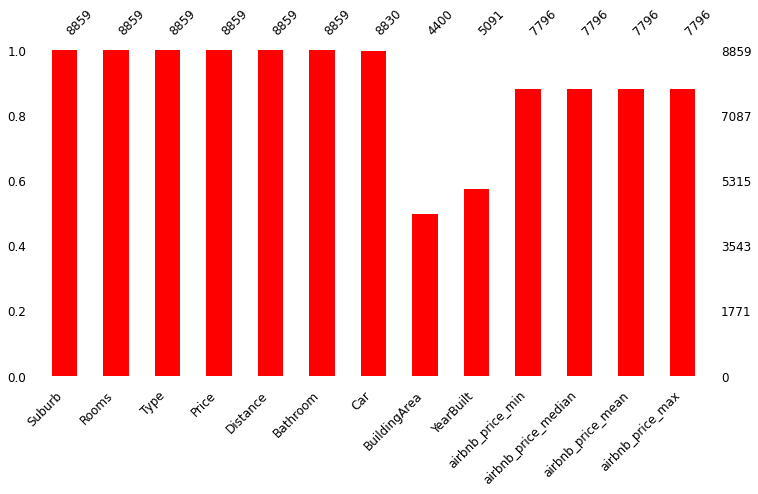

In [82]:
#Graficamos el dataframe original para observar los valores Nan de las variables
melb2= melb_df[['Suburb', 'Rooms', 'Type', 'Price', 'Distance', 'Bathroom', 'Car','BuildingArea', 'YearBuilt', 'airbnb_price_min', 'airbnb_price_median', 'airbnb_price_mean', 'airbnb_price_max']]
import missingno as msno
msno.bar(melb2,figsize=(12, 6), fontsize=12, color='red')

**Aplicaremos el estimador "Multivariate feature imputation" con los datos originales y posteriormente "KNeighborsRegressor" con los datos estandarizados ya que utiliza distancias en la búqueda de vecinos cercanos de las variables.**

a) Multivariate feature imputation (estimador: BayesianRidge)

In [83]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

df_imputer = df.copy(deep=True)

mice_imputer = IterativeImputer(random_state=0, estimator=BayesianRidge())
df_imputer[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(df_imputer[['YearBuilt','BuildingArea']])
df_imputer.head(3)

,YearBuilt,BuildingArea,Rooms,Price,Distance,Bathroom,Car,airbnb_price_min,airbnb_price_median,airbnb_price_mean,...,Suburb_Oakleigh,Suburb_Cheltenham,Suburb_Craigieburn,Suburb_Doncaster East,Suburb_Epping,Suburb_Lalor,Suburb_Mill Park,Suburb_Mount Waverley,Suburb_Werribee,Suburb_Glen Waverley
0,2016.0,225.0,3,840000.0,13.5,2.0,1.0,0.0,65.0,81.571429,...,0,0,0,0,0,0,0,0,0,0
1,1965.0,145.0,3,730000.0,13.5,2.0,1.0,0.0,65.0,81.571429,...,0,0,0,0,0,0,0,0,0,0
2,1965.0,145.0,3,770000.0,13.5,2.0,1.0,0.0,65.0,81.571429,...,0,0,0,0,0,0,0,0,0,0


Comparamos las distribuciones de datos: Originales e Imputados obtenidas con el método de imputación "Multivariate feature imputation"

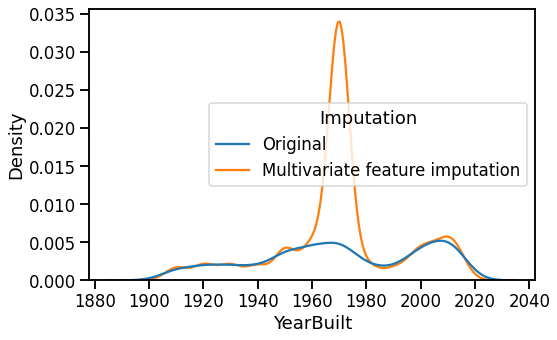

In [84]:
#Variable YearBuilt
df_imp_year_built = df_imputer.YearBuilt.to_frame()
df_imp_year_built['Imputation'] = "Multivariate feature imputation"
df_year_built = df.YearBuilt.dropna().to_frame()
df_year_built['Imputation'] = 'Original'
data1 = pandas.concat([df_year_built, df_imp_year_built]).reset_index()
fig = plt.figure(figsize=(8, 5))
g = sns.kdeplot(data=data1, x='YearBuilt', hue='Imputation')

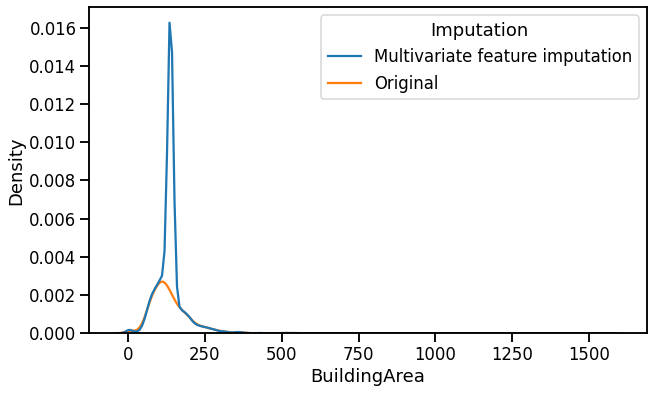

In [85]:
#Variable BuildingArea
df_imp_build = df_imputer.BuildingArea.to_frame()
df_imp_build['Imputation'] = "Multivariate feature imputation"
df_build = df.BuildingArea.dropna().to_frame()
df_build['Imputation'] = 'Original'
data2 = pandas.concat([df_imp_build, df_build]).reset_index()
fig = plt.figure(figsize=(10, 6))
g = sns.kdeplot(data=data2, x='BuildingArea', hue='Imputation')

b) Multivariate feature imputation (estimador: K-Nearest Neighbor Imputation)

In [86]:
columns_names = df.columns.values

df_scaler = df.copy(deep=True)

In [87]:
from sklearn.preprocessing import RobustScaler
escala = RobustScaler()
escala.fit(df_scaler[columns_names])
df_scaler.loc[:, columns_names] = escala.transform(df_scaler[columns_names])
df_scaler

,YearBuilt,BuildingArea,Rooms,Price,Distance,Bathroom,Car,airbnb_price_min,airbnb_price_median,airbnb_price_mean,...,Suburb_Oakleigh,Suburb_Cheltenham,Suburb_Craigieburn,Suburb_Doncaster East,Suburb_Epping,Suburb_Lalor,Suburb_Mill Park,Suburb_Mount Waverley,Suburb_Werribee,Suburb_Glen Waverley
0,0.92,1.436620,0.0,-0.113636,0.796296,1.0,-1.0,-2.714286,-0.586207,-0.633839,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.10,0.309859,0.0,-0.292208,0.796296,1.0,-1.0,-2.714286,-0.586207,-0.633839,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.10,0.309859,0.0,-0.227273,0.796296,1.0,-1.0,-2.714286,-0.586207,-0.633839,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.40,-0.549296,-1.0,-0.498377,0.796296,0.0,-1.0,-2.714286,-0.586207,-0.633839,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.78,0.154930,0.0,-0.340909,0.796296,1.0,0.0,-2.714286,-0.586207,-0.633839,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8854,0.72,-0.619718,-1.0,-0.422078,0.981481,0.0,-1.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8855,0.20,0.690141,1.0,-0.446429,1.018519,1.0,-1.0,1.000000,-0.482759,0.021784,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8856,0.50,0.140845,0.0,0.196429,-0.444444,1.0,0.0,5.857143,3.379310,1.467184,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8857,0.54,NaN,0.0,0.422078,-0.444444,1.0,2.0,5.857143,3.379310,1.467184,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


b) .1 Con 2 variables

In [88]:
#Imputamos las variables con Nan utilizando solo "BuildingArea" y "YearBuilt" 

df_knn = df_scaler.copy()

imputer = IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=5))
df_knn[['YearBuilt','BuildingArea']] = imputer.fit_transform(df_knn[['YearBuilt','BuildingArea']])
df_knn.head(2)


/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


,YearBuilt,BuildingArea,Rooms,Price,Distance,Bathroom,Car,airbnb_price_min,airbnb_price_median,airbnb_price_mean,...,Suburb_Oakleigh,Suburb_Cheltenham,Suburb_Craigieburn,Suburb_Doncaster East,Suburb_Epping,Suburb_Lalor,Suburb_Mill Park,Suburb_Mount Waverley,Suburb_Werribee,Suburb_Glen Waverley
0,0.92,1.436620,0.0,-0.113636,0.796296,1.0,-1.0,-2.714286,-0.586207,-0.633839,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.10,0.309859,0.0,-0.292208,0.796296,1.0,-1.0,-2.714286,-0.586207,-0.633839,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


b) .1 Con todas las variables

In [89]:
#Imputamos las variables con Nan utilizando todas las variables

df_knn_all = df_scaler.copy()

imputer = IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=5))
df_knn_all= imputer.fit_transform(df_knn_all)
df_knn_all = pandas.DataFrame(data=df_knn_all, columns=columns_names)
df_knn_all.head(3)

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


,YearBuilt,BuildingArea,Rooms,Price,Distance,Bathroom,Car,airbnb_price_min,airbnb_price_median,airbnb_price_mean,...,Suburb_Oakleigh,Suburb_Cheltenham,Suburb_Craigieburn,Suburb_Doncaster East,Suburb_Epping,Suburb_Lalor,Suburb_Mill Park,Suburb_Mount Waverley,Suburb_Werribee,Suburb_Glen Waverley
0,0.92,1.436620,0.0,-0.113636,0.796296,1.0,-1.0,-2.714286,-0.586207,-0.633839,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.10,0.309859,0.0,-0.292208,0.796296,1.0,-1.0,-2.714286,-0.586207,-0.633839,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.10,0.309859,0.0,-0.227273,0.796296,1.0,-1.0,-2.714286,-0.586207,-0.633839,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


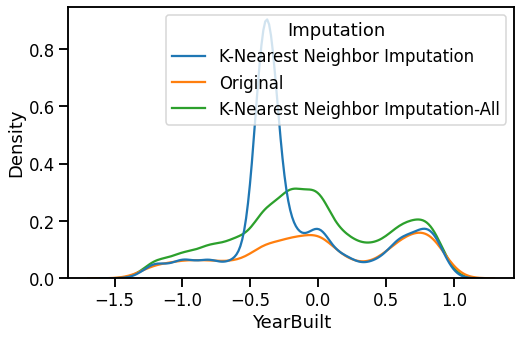

In [90]:
#Variable YearBuilt
df_knn_year = df_knn.YearBuilt.to_frame()
df_knn_year['Imputation'] = "K-Nearest Neighbor Imputation"
df_year = df_scaler.YearBuilt.dropna().to_frame()
df_year['Imputation'] = 'Original'
df_knn_all_year = df_knn_all.YearBuilt.to_frame()
df_knn_all_year['Imputation'] = "K-Nearest Neighbor Imputation-All"
data3 = pandas.concat([df_knn_year, df_year, df_knn_all_year]).reset_index()
fig = plt.figure(figsize=(8, 5))
g = sns.kdeplot(data=data3, x='YearBuilt', hue='Imputation')

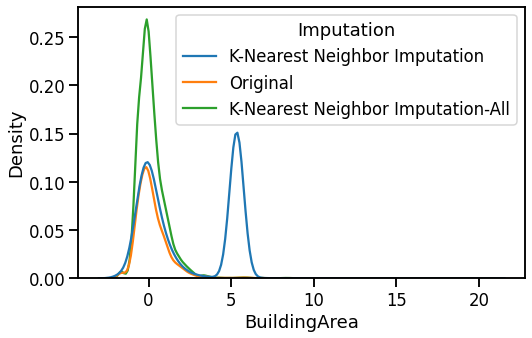

In [91]:
#Variable BuildingArea
df_knn_build = df_knn.BuildingArea.to_frame()
df_knn_build['Imputation'] = "K-Nearest Neighbor Imputation"
df_build2 = df_scaler.BuildingArea.dropna().to_frame()
df_build2['Imputation'] = 'Original'
df_knn_all_build = df_knn_all.BuildingArea.to_frame()
df_knn_all_build['Imputation'] = "K-Nearest Neighbor Imputation-All"
data4 = pandas.concat([df_knn_build, df_build2, df_knn_all_build]).reset_index()
fig = plt.figure(figsize=(8, 5))
g = sns.kdeplot(data=data4, x='BuildingArea', hue='Imputation')

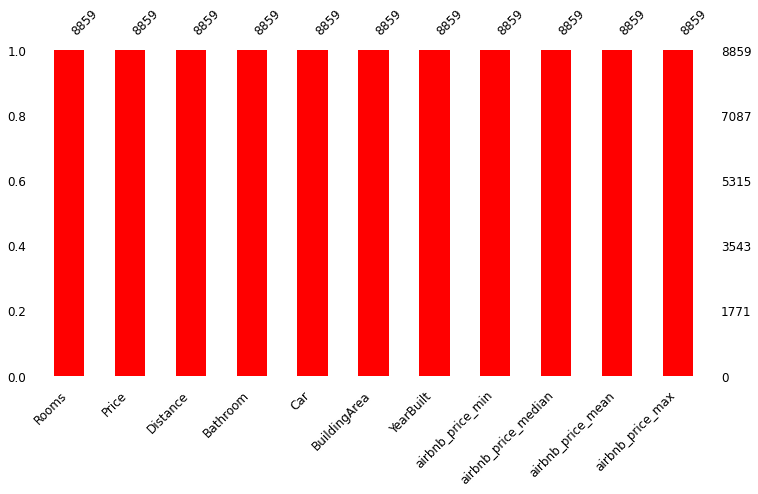

In [92]:
#Graficamos el dataframe luego de imputar las variables YearBuilt y BuildingArea
melb3= df_knn_all[['Rooms', 'Price', 'Distance', 'Bathroom', 'Car','BuildingArea', 'YearBuilt', 'airbnb_price_min', 'airbnb_price_median', 'airbnb_price_mean', 'airbnb_price_max']]
import missingno as msno
msno.bar(melb3,figsize=(12, 6), fontsize=12, color='red')


## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

**3) Solución Reducción de dimensionalidad**

Dado que las variables de nuestro dataset están expresados en diferentes unidades es necesario estandarizar sus valores, ya que el método de PCA identifica las direcciones con mayor varianza. Como la varianza de una variable se mide en sus mismas unidades elevadas al cuadrado, si antes de calcular las componentes no se estandarizan todas las variables para que tengan media cero y desviación estándar uno, aquellas variables cuya escala sea mayor dominarán al resto. Por lo tanto es recomendable estandarizar siempre los datos.

Ademas debemos asegurarnos que nuestro dataframe no contenga registros "Nan" antes de ejecutar el método PCA.

In [105]:
#Control de Nan
df_knn_all[['Rooms', 'Price', 'Distance', 'Bathroom', 'Car','BuildingArea', 'YearBuilt', 'airbnb_price_min', 'airbnb_price_median', 'airbnb_price_mean', 'airbnb_price_max']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8859 entries, 0 to 8858
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rooms                8859 non-null   float64
 1   Price                8859 non-null   float64
 2   Distance             8859 non-null   float64
 3   Bathroom             8859 non-null   float64
 4   Car                  8859 non-null   float64
 5   BuildingArea         8859 non-null   float64
 6   YearBuilt            8859 non-null   float64
 7   airbnb_price_min     8859 non-null   float64
 8   airbnb_price_median  8859 non-null   float64
 9   airbnb_price_mean    8859 non-null   float64
 10  airbnb_price_max     8859 non-null   float64
dtypes: float64(11)
memory usage: 761.4 KB


In [106]:
#Copia del dataframe
df_imputer2 = df_knn_all.copy()

#knn_imputer = IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=5))
#df_imputer2[['Car', 'airbnb_price_min','airbnb_price_median','airbnb_price_mean', 'airbnb_price_max']] = knn_imputer.fit_transform(
#    df_imputer2[['Car', 'airbnb_price_min','airbnb_price_median','airbnb_price_mean', 'airbnb_price_max']])


In [95]:
#Control de Nan en columnas imputadas
#df_imputer2[['Car','YearBuilt', 'BuildingArea', 'airbnb_price_min','airbnb_price_median','airbnb_price_mean', 'airbnb_price_max']].isnull().any()

In [168]:
#Aplicamos el método de PCA para el total de atributos
from sklearn.decomposition import PCA

n_comp=20
pca = PCA(n_comp)
princ_comp = pca.fit(df_imputer2)
var_expl = pca.explained_variance_
prop_var_expl = pca.explained_variance_ratio_

In [158]:
pca.explained_variance_ratio_

array([0.45781221, 0.13095644, 0.12512675, 0.07240957, 0.04015131,
       0.0329516 , 0.02248176, 0.02150803, 0.01219575, 0.00914441,
       0.00849932, 0.00609078, 0.00489157, 0.00161229, 0.00154842,
       0.00127975, 0.00122222, 0.00120359, 0.00116294, 0.00110725])

Proporción de Varianza Explicada acumulada para todas las componentes

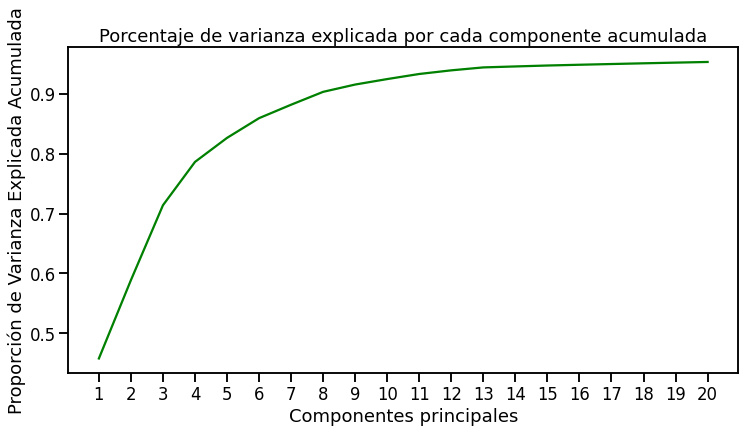

In [170]:
eje_y = np.cumsum(prop_var_expl)
fig,ax = plt.subplots(figsize = [12,6])

ax.plot([str(i) for i in range(1,n_comp+1)], eje_y, color="green")
plt.xlabel('Componentes principales')
ax.set_title('Porcentaje de varianza explicada por cada componente acumulada')
plt.ylabel("Proporción de Varianza Explicada Acumulada")
plt.show()

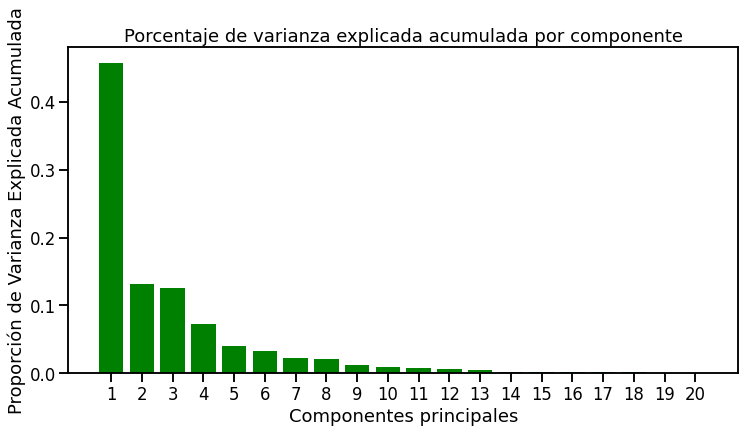

In [173]:

eje_y = prop_var_expl
fig,ax = plt.subplots(figsize = [12,6])
plt.bar([str(i) for i in range(1,n_comp+1)], eje_y, color="green")
plt.xlabel('Componentes principales')
ax.set_title('Porcentaje de varianza explicada acumulada por componente')
plt.ylabel("Proporción de Varianza Explicada Acumulada")
plt.show()

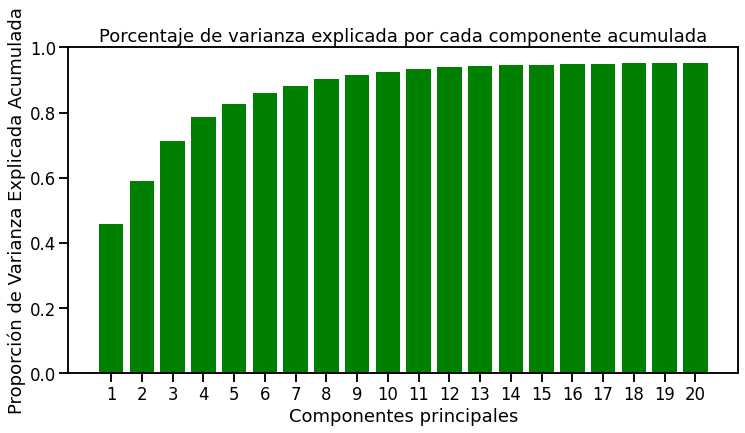

In [160]:
eje_y = np.cumsum(prop_var_expl)
fig,ax = plt.subplots(figsize = [12,6])
plt.bar([str(i) for i in range(1,n_comp+1)], eje_y, color="green")
plt.xlabel('Componentes principales')
ax.set_title('Porcentaje de varianza explicada por cada componente acumulada')
plt.ylabel("Proporción de Varianza Explicada Acumulada")
plt.show()


Observamos que a partir de 8-9 componentes el incremento en la Proporción de la Varianza Explicada Acumulada por cada componente agregado deja de ser importante. Elegimos quedarnos con 8 componentes que explican aprox. el 90% de los datos.

**Seleccionamos los primeros 8 componentes**

In [162]:
#Aplicamos PCA para el número de componentes que decidimos en el paso anterior
n_comp2=8
pca = PCA(n_comp2)
princ_comp = pca.fit(df_imputer2)
"""Cada número es el peso que se le asigna a los 21 atributos y luego se
"suma la multiplicación del peso*atributo para obtener la componente principal"""
var_expl = pca.explained_variance_
prop_var_expl = pca.explained_variance_ratio_

In [163]:
#Seleccionamos las primeras  columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.
n_comp2=8
df_pca= pca.transform(df_imputer2)
df_components = pandas.DataFrame(data=df_pca,
    columns =[f"PC" + str(i) for i in range(1,n_comp2+1)])
df_components

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-1.371562,-2.955715,-0.946067,0.444186,-0.223093,1.919275,0.417213,0.313324
1,-1.345073,-2.814944,-1.320849,0.134733,-0.503052,0.535413,-0.354507,0.484098
2,-1.347039,-2.818236,-1.303243,0.156027,-0.516636,0.515887,-0.358456,0.479424
3,-1.258736,-2.309105,-2.461216,-0.375714,-0.259400,-0.278784,-0.116386,0.912842
4,-1.327804,-2.886317,-1.247654,0.087151,0.889238,1.112162,-0.287803,0.044212
...,...,...,...,...,...,...,...,...
8854,-1.098332,0.473627,-0.855105,-1.490197,0.060710,0.414784,-0.231602,0.767286
8855,-0.990332,-0.044894,1.102409,-0.935771,-0.631896,1.067215,-0.708980,0.458480
8856,-0.227623,5.835148,2.855745,0.695729,0.831372,0.188615,-0.340960,0.004635
8857,-0.256489,5.309180,3.905213,0.833309,2.278175,-0.412167,0.375320,-0.083574


In [134]:
df_final= pandas.concat([df_knn_all, df_components], axis = 1)
df_final

,YearBuilt,BuildingArea,Rooms,Price,Distance,Bathroom,Car,airbnb_price_min,airbnb_price_median,airbnb_price_mean,...,Suburb_Werribee,Suburb_Glen Waverley,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.92,1.436620,0.0,-0.113636,0.796296,1.0,-1.0,-2.714286,-0.586207,-0.633839,...,0.0,0.0,-1.371562,-2.955715,-0.946067,0.444186,-0.223093,1.919275,0.417213,0.313324
1,-0.10,0.309859,0.0,-0.292208,0.796296,1.0,-1.0,-2.714286,-0.586207,-0.633839,...,0.0,0.0,-1.345073,-2.814944,-1.320849,0.134733,-0.503052,0.535413,-0.354507,0.484098
2,-0.10,0.309859,0.0,-0.227273,0.796296,1.0,-1.0,-2.714286,-0.586207,-0.633839,...,0.0,0.0,-1.347039,-2.818236,-1.303243,0.156027,-0.516636,0.515887,-0.358456,0.479424
3,-0.40,-0.549296,-1.0,-0.498377,0.796296,0.0,-1.0,-2.714286,-0.586207,-0.633839,...,0.0,0.0,-1.258736,-2.309105,-2.461216,-0.375714,-0.259400,-0.278784,-0.116386,0.912842
4,0.78,0.154930,0.0,-0.340909,0.796296,1.0,0.0,-2.714286,-0.586207,-0.633839,...,0.0,0.0,-1.327804,-2.886317,-1.247654,0.087151,0.889238,1.112162,-0.287803,0.044212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8854,0.72,-0.619718,-1.0,-0.422078,0.981481,0.0,-1.0,0.685714,-0.413793,-0.341761,...,0.0,0.0,-1.098332,0.473627,-0.855105,-1.490197,0.060710,0.414784,-0.231602,0.767286
8855,0.20,0.690141,1.0,-0.446429,1.018519,1.0,-1.0,1.000000,-0.482759,0.021784,...,1.0,0.0,-0.990332,-0.044894,1.102409,-0.935771,-0.631896,1.067215,-0.708980,0.458480
8856,0.50,0.140845,0.0,0.196429,-0.444444,1.0,0.0,5.857143,3.379310,1.467184,...,0.0,0.0,-0.227623,5.835148,2.855745,0.695729,0.831372,0.188615,-0.340960,0.004635
8857,0.54,0.718310,0.0,0.422078,-0.444444,1.0,2.0,5.857143,3.379310,1.467184,...,0.0,0.0,-0.256489,5.309180,3.905213,0.833309,2.278175,-0.412167,0.375320,-0.083574


## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

**EJEMPLOS**

Small example
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

Si tratamos nuestros datos con los siguientes pasos:
categorical_cols = ['Type', 'Regionname']
numerical_cols = ['Rooms', 'Distance']
new_columns = []

Paso 1: codifica columnas categóricas
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_cat = encoder.fit_transform(melb_df[categorical_cols])
for col, col_values in zip(categorical_cols, encoder.categories_):
  for col_value in col_values:
    new_columns.append('{}={}'.format(col, col_value))
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

Paso 2: agregue las columnas numéricas
X = numpy.hstack([X_cat, melb_df[numerical_cols].values])
new_columns.extend(numerical_cols)
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

Paso 3: agregue algunas características nuevas, como PCA
pca = PCA(n_components=2)
pca_dummy_features = pca.fit_transform(X)
X_pca = numpy.hstack([X, pca_dummy_features])
new_columns.extend(['pca1', 'pca2'])

Reconstruir dataframe
processed_melb_df = pandas.DataFrame(data=X_pca, columns=new_columns)
processed_melb_df.head()

**4) Solución:**

En el item 3.3 resolvimos trabajar directamente con los dataframes. Unimos el daframe obtenido al aplicar PCA con el dataframe en el que habíamos imputado los valores a aquellos atributos que tenían valores NAN. El conjunto de datos procesados es el dataframe df_final.

In [135]:
#como ya es un dataframe, solo lo guardamos en csv
df_final.to_csv("FINAL.csv")
##files.download('FINAL.csv')

## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. 

```

**5) Solución:**

[Link de "Documentación"](https://github.com/CHRISTIANDAGATTI/AEyCD---Grupo-9/blob/baaa5d2b690873718f5d7a73c82bc2be89190007/Entregable%202%20-%20Documentaci%C3%B3n.pdf)